<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'winequality_merged.csv'

df = pd.read_csv(wine_csv)

df.shape

(6497, 13)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
red_wine                False
dtype: bool

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#### 1.2 Explore Data (Exploratory Data Analysis)

Include pairplot & correlation heatmap table

In [7]:
# ANSWER
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Figure size 1440x432 with 0 Axes>

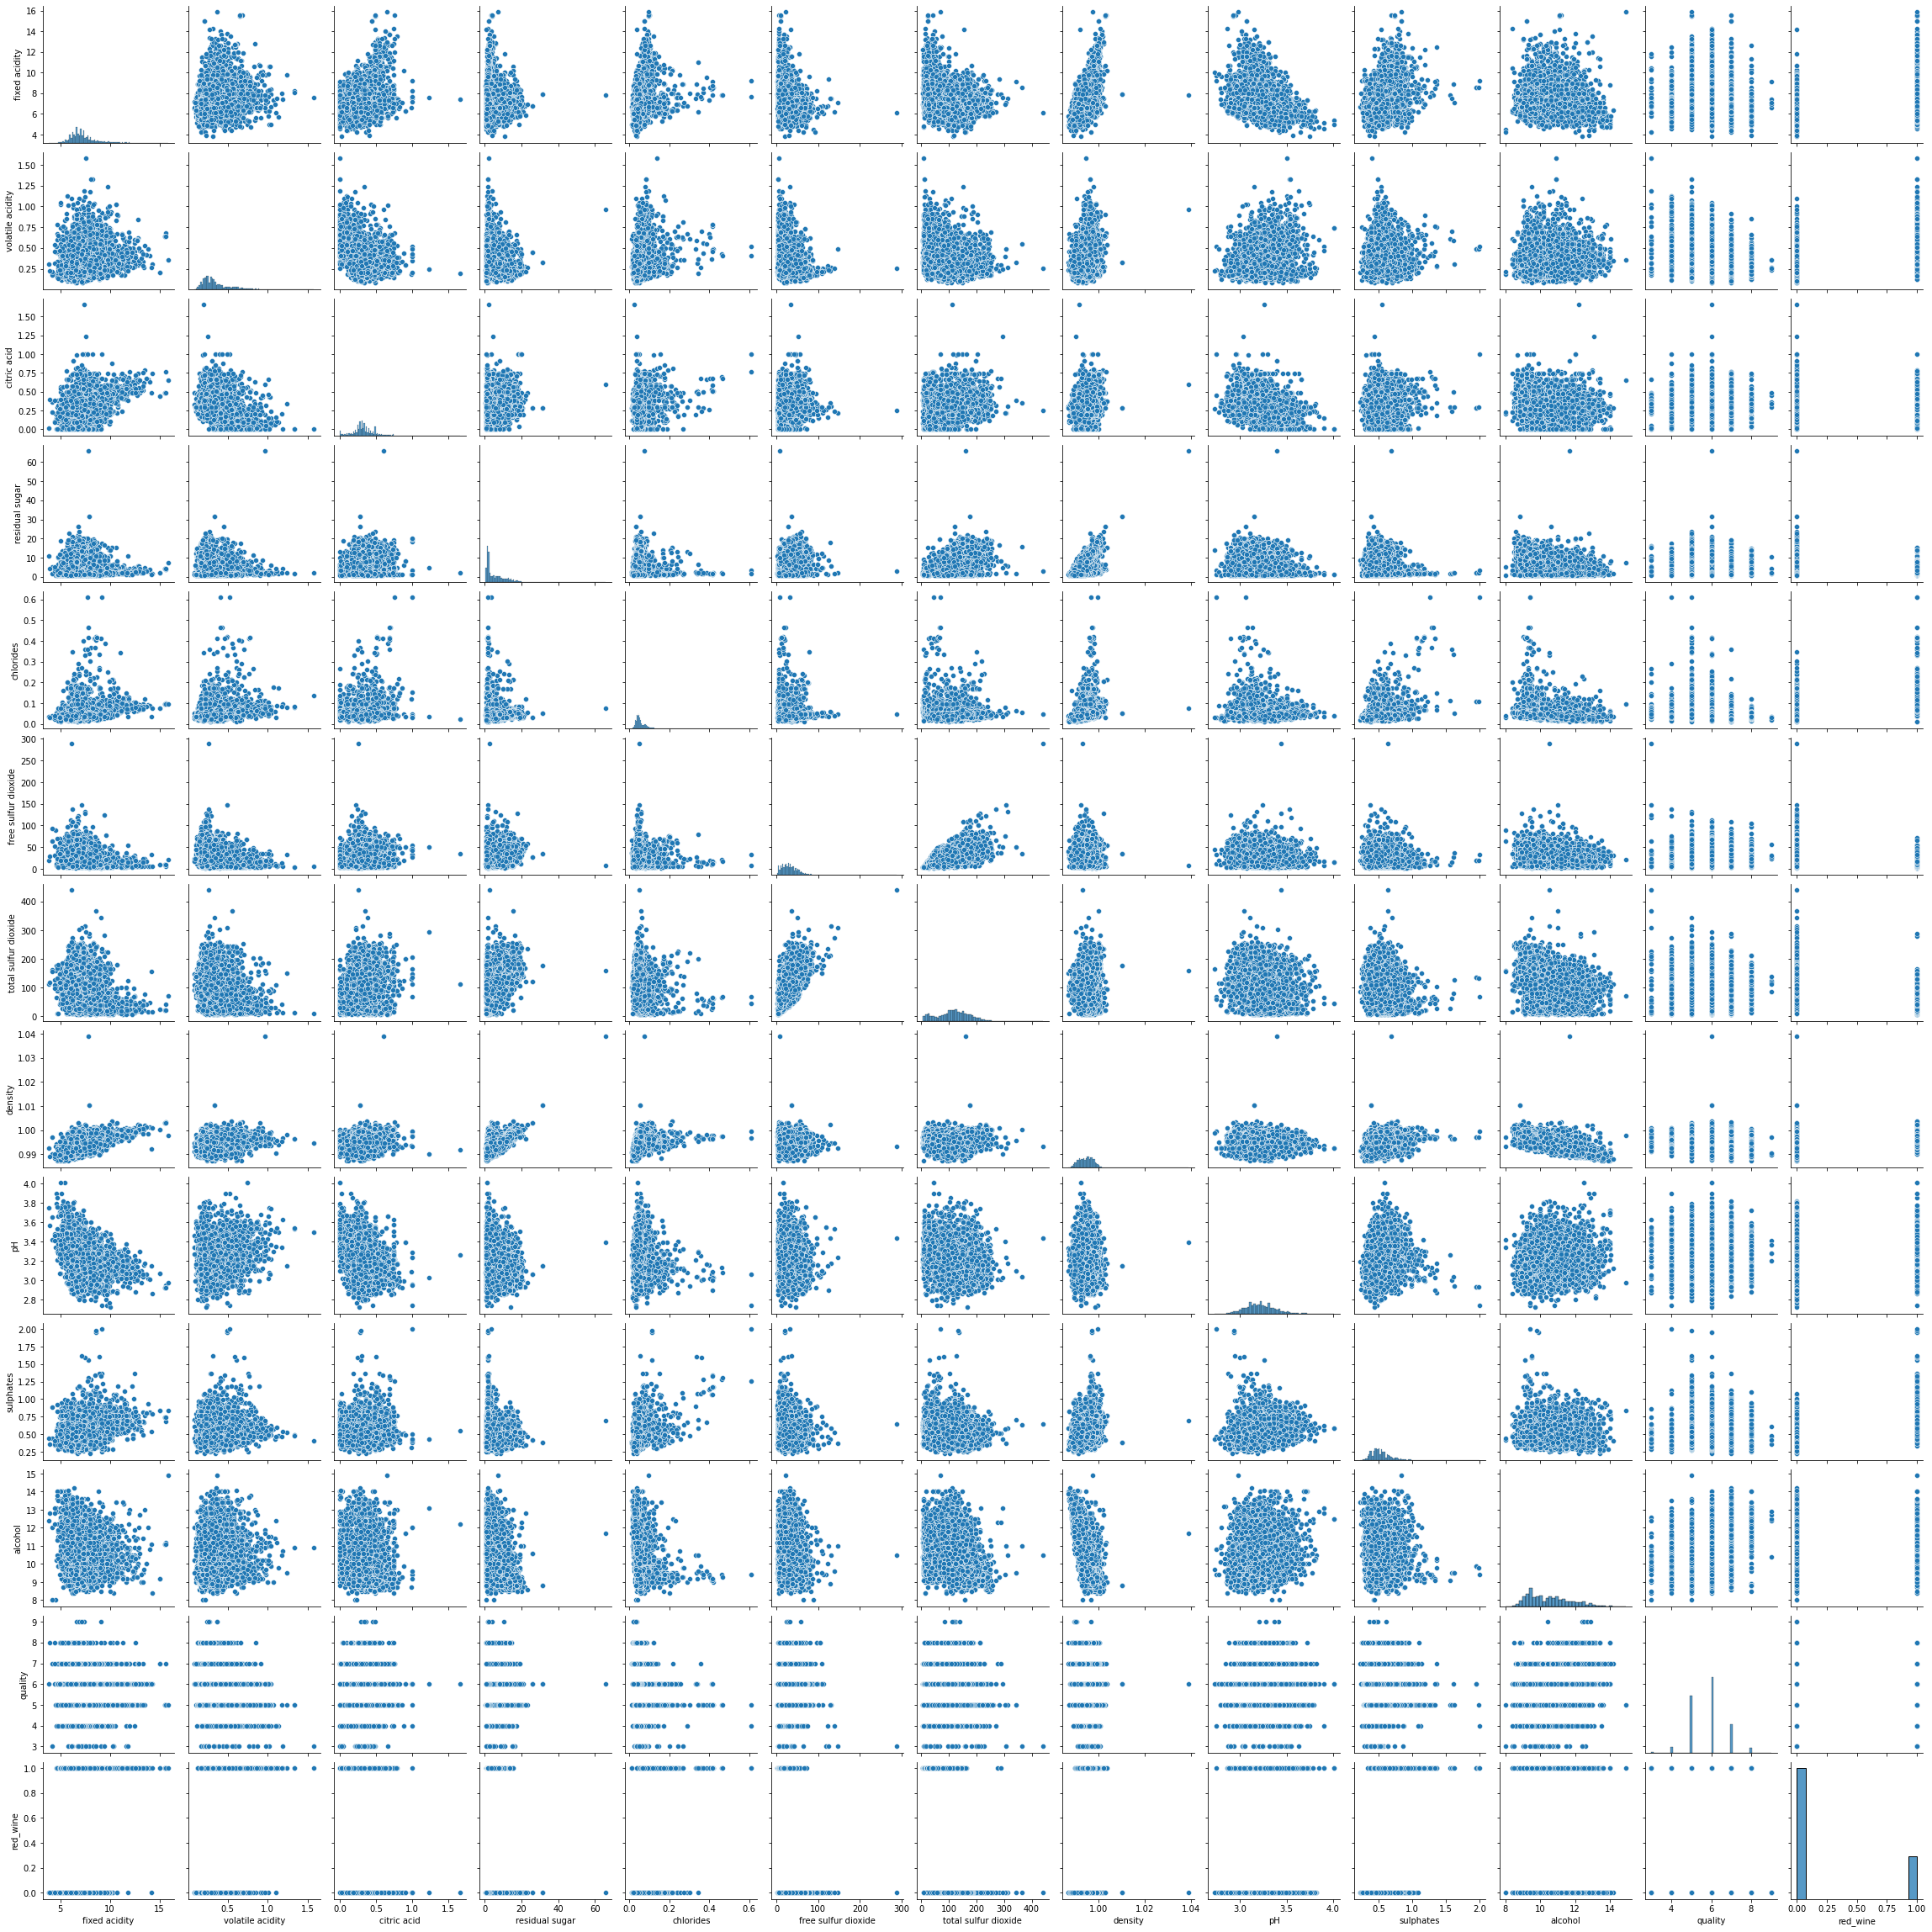

In [8]:
plt.figure(figsize = (20,6))
sns.pairplot(df)

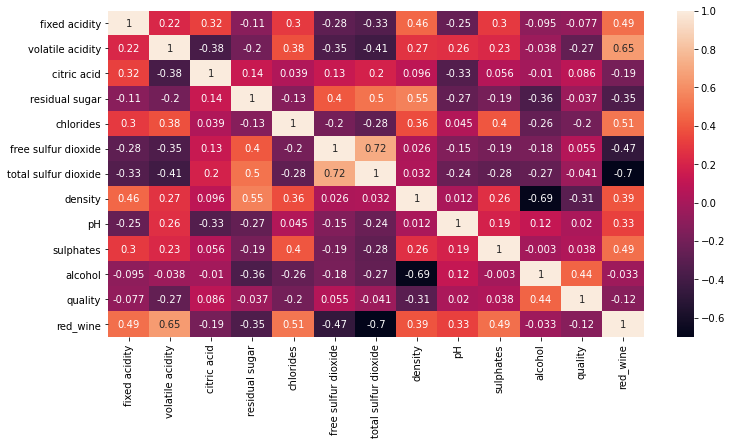

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True)

In [10]:
cor = df.corr().unstack()

c = cor.sort_values(kind = 'quicksort')

c.sort_values(ascending = False).drop_duplicates()

red_wine              red_wine                1.000000
free sulfur dioxide   total sulfur dioxide    0.720934
red_wine              volatile acidity        0.653036
residual sugar        density                 0.552517
chlorides             red_wine                0.512678
                                                ...   
citric acid           volatile acidity       -0.377981
total sulfur dioxide  volatile acidity       -0.414476
red_wine              free sulfur dioxide    -0.471644
density               alcohol                -0.686745
total sulfur dioxide  red_wine               -0.700357
Length: 79, dtype: float64

**Findings**


1) `free sulfur dioxide` & `total sulfur dioxide` have a correlation of 0.72 

2) `volatile_acidity` & `red_wine` have a correlation of 0.65

3) `density` & `residual_sugar` have a correlation of 0.55

4) `chlorides` & `red_wine` have a correlation of 0.51

### 2. Set Target Variable

Create a target variable (y) for wine quality.

In [11]:
# Target Variable

y = df['quality']


### 3. Set Predictor Variables

Create a predictor matrix (DataFrame) with variables of your choice. State your reason.

In [12]:
# ANSWER
X = pd.DataFrame(data = df,columns = ['alcohol','volatile acidity', 'density','chlorides'] )

X

,alcohol,volatile acidity,density,chlorides
0,9.4,0.70,0.99780,0.076
1,9.8,0.88,0.99680,0.098
2,9.8,0.76,0.99700,0.092
3,9.8,0.28,0.99800,0.075
4,9.4,0.70,0.99780,0.076
...,...,...,...,...
6492,11.2,0.21,0.99114,0.039
6493,9.6,0.32,0.99490,0.047
6494,9.4,0.24,0.99254,0.041
6495,12.8,0.29,0.98869,0.022


Highest Correlation with Quality
1) `alcohol` - 0.44
2) `citric acid` - 0.086
3) `free sulfur dioxide` - 0.055

In [13]:
# check correlations (list in ascending order)
X.corr()

,alcohol,volatile acidity,density,chlorides
alcohol,1.000000,-0.037640,-0.686745,-0.256916
volatile acidity,-0.037640,1.000000,0.271296,0.377124
density,-0.686745,0.271296,1.000000,0.362615
chlorides,-0.256916,0.377124,0.362615,1.000000


### 4. Using Linear Regression Create a Model and Test Score

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
# Create a model for Linear Regression
reg = LinearRegression()
# Fit the model with the Training data
reg.fit(X_train,y_train)
# Calculate the score (R^2 for Regression) for Training Data
display(reg.score(X_train,y_train))
# Calculate the score (R^2 for Regression) for Testing Data
display(reg.score(X_test,y_test))

0.2707886547599643

0.25213547513049606

In [17]:
#Try to build a function for linear regression

def linear_regression (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    r2_train = reg.score(X_train,y_train)
    r2_test = reg.score(X_test,y_test)
    
    print('The R^2 Value for the training data is ',r2_train)
    print('The R^2 Value for the test data is ',r2_test)
    
    return r2_train,r2_test

linear_regression(X,y)

The R^2 Value for the training data is  0.2707886547599643
The R^2 Value for the test data is  0.25213547513049606


(0.2707886547599643, 0.25213547513049606)

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

Use 2 features, R^2 is about 0.19 which is not that good 

In [18]:
#Drop 2 features and only fit alcohol as a predictor

X2 = pd.DataFrame(data = df,columns = ['alcohol'] )

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=42)

reg.fit(X2_train,y_train)

display(reg.score(X2_train,y_train))
display(reg.score(X2_test,y_test))

0.20109549577996289

0.18158453862144674

### BONUS: Cross validation

In [19]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [57]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test =y.iloc[test]
    # Fit model with training set
    reg.fit(X_train,y_train)
    # Make predictions with training and test set
    r2_train = reg.score(X_train,y_train)
    r2_test = reg.score(X_test,y_test)
    train_pred = reg.predict(X_train)
    test_pred = reg.predict(X_test)
    mse_train = mean_squared_error(y_train,train_pred)
    mse_test = mean_squared_error(y_test,test_pred)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(r2_train)
    test_scores.append(r2_test)
    train_rmse.append(mse_train)
    test_rmse.append(mse_test)
    
# Create a metrics_df dataframe to display r2 and rmse scores
metric_df = pd.DataFrame(list(zip(train_scores,test_scores,train_rmse,test_rmse)), columns =['r2_train','r2_test','mse_train','mse_test'])

In [ ]:
# Describe the metrics

In [58]:
metric_df

,r2_train,r2_test,mse_train,mse_test
0,0.270789,0.252135,0.560300,0.552333
1,0.266588,0.269966,0.559177,0.556500
2,0.265044,0.275473,0.558975,0.557354
3,0.269225,0.259646,0.553771,0.578206
4,0.265677,0.273032,0.560333,0.552329


**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



